In [1]:
print("Hello, Jupyter!")

Hello, Jupyter!


In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
!pip install pyarrow


In [5]:
import pandas as pd

df = pd.read_parquet("13_processed_df.parquet")
df.head()

,cont__latitude,cont__longitude,cont__review_count_log1p,cont__rl_word_mean,cont__rl_share_short24,cont__total_weekly_hours,cont__days_open,cont__weekend_hours,cont__avg_daily_hours,ord__attr_RestaurantsPriceRange2,...,onehot_already__cat__Seafood,onehot_already__cat__Chinese,onehot_already__cat__Salad,onehot_already__cat__Chicken Wings,onehot_already__cat__Cafes,onehot_already__cat__Delis,onehot_already__cat__Caterers,onehot_already__cat__Specialty Food,onehot_already__cat__Bakeries,onehot_already__cat__Desserts
0,0.475021,0.989187,0.364519,0.120875,0.05,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.333718,0.727110,0.021590,0.098947,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.331361,0.733512,0.084892,0.177849,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.014982,0.828446,0.084892,0.140839,0.00,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.462816,0.747624,0.220662,0.152250,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(df.columns)




 

Index(['cont__latitude', 'cont__longitude', 'cont__review_count_log1p',
       'cont__rl_word_mean', 'cont__rl_share_short24',
       'cont__total_weekly_hours', 'cont__days_open', 'cont__weekend_hours',
       'cont__avg_daily_hours', 'ord__attr_RestaurantsPriceRange2',
       'ord__attr_NoiseLevel', 'ord__attr_RestaurantsAttire',
       'nom__attr_WiFi_free', 'nom__attr_WiFi_missing', 'nom__attr_WiFi_no',
       'nom__attr_WiFi_paid', 'nom__attr_Alcohol_beer_and_wine',
       'nom__attr_Alcohol_full_bar', 'nom__attr_Alcohol_missing',
       'nom__attr_Smoking_missing', 'bool__is_open',
       'bool__attr_ByAppointmentOnly', 'bool__attr_BusinessAcceptsCreditCards',
       'bool__attr_BikeParking', 'bool__attr_RestaurantsTakeOut',
       'bool__attr_RestaurantsDelivery', 'bool__attr_Caters',
       'bool__attr_WheelchairAccessible', 'bool__attr_HappyHour',
       'bool__attr_OutdoorSeating', 'bool__attr_HasTV',
       'bool__attr_RestaurantsReservations', 'bool__attr_DogsAllowed',
    

In [7]:
import os
print(os.getcwd())  # shows your current notebook directory
print(os.listdir()) # lists files in that directory


/Users/swikritijoshi
['.Rhistory', '.config', 'Music', '13_processed_df.parquet', 'Untitled1.ipynb', '.DS_Store', 'yelp_review_project', '.CFUserTextEncoding', '.xonshrc', 'Untitled.ipynb', '.zshrc', 'Supervised logistic regression.ipynb', '.local', 'Pictures', 'yelp_review_project.ipynb', 'yelp.ipynb', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '11_biz_merged_clean.parquet', '.cups', '.bash_sessions', 'Public', '.idlerc', '.tcshrc', '.RData', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.mysql_history', '.vscode', '.bash_profile', 'Downloads', '.python_history', '.gitconfig', '.bash_history', '.conda']


In [8]:
import pandas as pd
df = pd.read_parquet("13_processed_df.parquet")
print(df.shape)
df.head()

(36261, 72)


,cont__latitude,cont__longitude,cont__review_count_log1p,cont__rl_word_mean,cont__rl_share_short24,cont__total_weekly_hours,cont__days_open,cont__weekend_hours,cont__avg_daily_hours,ord__attr_RestaurantsPriceRange2,...,onehot_already__cat__Seafood,onehot_already__cat__Chinese,onehot_already__cat__Salad,onehot_already__cat__Chicken Wings,onehot_already__cat__Cafes,onehot_already__cat__Delis,onehot_already__cat__Caterers,onehot_already__cat__Specialty Food,onehot_already__cat__Bakeries,onehot_already__cat__Desserts
0,0.475021,0.989187,0.364519,0.120875,0.05,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.333718,0.727110,0.021590,0.098947,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.331361,0.733512,0.084892,0.177849,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.014982,0.828446,0.084892,0.140839,0.00,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.462816,0.747624,0.220662,0.152250,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
!pip install pyarrow

In [10]:
!pip install fastparquet

In [11]:
!pip install pyarrow scikit-optimize scipy

In [12]:
import os, pandas as pd
print("CWD:", os.getcwd())
print("Here:", os.listdir())

df = pd.read_parquet("13_processed_df.parquet")  # uses pyarrow under the hood
print("Shape:", df.shape)
df.head()

CWD: /Users/swikritijoshi
Here: ['.Rhistory', '.config', 'Music', '13_processed_df.parquet', 'Untitled1.ipynb', '.DS_Store', 'yelp_review_project', '.CFUserTextEncoding', '.xonshrc', 'Untitled.ipynb', '.zshrc', 'Supervised logistic regression.ipynb', '.local', 'Pictures', 'yelp_review_project.ipynb', 'yelp.ipynb', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '11_biz_merged_clean.parquet', '.cups', '.bash_sessions', 'Public', '.idlerc', '.tcshrc', '.RData', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.mysql_history', '.vscode', '.bash_profile', 'Downloads', '.python_history', '.gitconfig', '.bash_history', '.conda']
Shape: (36261, 72)


,cont__latitude,cont__longitude,cont__review_count_log1p,cont__rl_word_mean,cont__rl_share_short24,cont__total_weekly_hours,cont__days_open,cont__weekend_hours,cont__avg_daily_hours,ord__attr_RestaurantsPriceRange2,...,onehot_already__cat__Seafood,onehot_already__cat__Chinese,onehot_already__cat__Salad,onehot_already__cat__Chicken Wings,onehot_already__cat__Cafes,onehot_already__cat__Delis,onehot_already__cat__Caterers,onehot_already__cat__Specialty Food,onehot_already__cat__Bakeries,onehot_already__cat__Desserts
0,0.475021,0.989187,0.364519,0.120875,0.05,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.333718,0.727110,0.021590,0.098947,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.331361,0.733512,0.084892,0.177849,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.014982,0.828446,0.084892,0.140839,0.00,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.462816,0.747624,0.220662,0.152250,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import pandas as pd

df = pd.read_parquet("13_processed_df.parquet")
print(df.columns.tolist())

['cont__latitude', 'cont__longitude', 'cont__review_count_log1p', 'cont__rl_word_mean', 'cont__rl_share_short24', 'cont__total_weekly_hours', 'cont__days_open', 'cont__weekend_hours', 'cont__avg_daily_hours', 'ord__attr_RestaurantsPriceRange2', 'ord__attr_NoiseLevel', 'ord__attr_RestaurantsAttire', 'nom__attr_WiFi_free', 'nom__attr_WiFi_missing', 'nom__attr_WiFi_no', 'nom__attr_WiFi_paid', 'nom__attr_Alcohol_beer_and_wine', 'nom__attr_Alcohol_full_bar', 'nom__attr_Alcohol_missing', 'nom__attr_Smoking_missing', 'bool__is_open', 'bool__attr_ByAppointmentOnly', 'bool__attr_BusinessAcceptsCreditCards', 'bool__attr_BikeParking', 'bool__attr_RestaurantsTakeOut', 'bool__attr_RestaurantsDelivery', 'bool__attr_Caters', 'bool__attr_WheelchairAccessible', 'bool__attr_HappyHour', 'bool__attr_OutdoorSeating', 'bool__attr_HasTV', 'bool__attr_RestaurantsReservations', 'bool__attr_DogsAllowed', 'bool__attr_GoodForKids', 'bool__attr_RestaurantsTableService', 'bool__attr_RestaurantsGoodForGroups', 'bool

In [14]:
!pip install pyarrow scikit-optimize scipy

In [15]:
import os, pandas as pd
print("CWD:", os.getcwd())
print("Here:", os.listdir())

X = pd.read_parquet("13_processed_df.parquet")  # uses pyarrow
print("X shape:", X.shape)
X.head()

CWD: /Users/swikritijoshi
Here: ['.Rhistory', '.config', 'Music', '13_processed_df.parquet', 'Untitled1.ipynb', '.DS_Store', 'yelp_review_project', '.CFUserTextEncoding', '.xonshrc', 'Untitled.ipynb', '.zshrc', 'Supervised logistic regression.ipynb', '.local', 'Pictures', 'yelp_review_project.ipynb', 'yelp.ipynb', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '11_biz_merged_clean.parquet', '.cups', '.bash_sessions', 'Public', '.idlerc', '.tcshrc', '.RData', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.mysql_history', '.vscode', '.bash_profile', 'Downloads', '.python_history', '.gitconfig', '.bash_history', '.conda']
X shape: (36261, 72)


,cont__latitude,cont__longitude,cont__review_count_log1p,cont__rl_word_mean,cont__rl_share_short24,cont__total_weekly_hours,cont__days_open,cont__weekend_hours,cont__avg_daily_hours,ord__attr_RestaurantsPriceRange2,...,onehot_already__cat__Seafood,onehot_already__cat__Chinese,onehot_already__cat__Salad,onehot_already__cat__Chicken Wings,onehot_already__cat__Cafes,onehot_already__cat__Delis,onehot_already__cat__Caterers,onehot_already__cat__Specialty Food,onehot_already__cat__Bakeries,onehot_already__cat__Desserts
0,0.475021,0.989187,0.364519,0.120875,0.05,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.333718,0.727110,0.021590,0.098947,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.331361,0.733512,0.084892,0.177849,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.014982,0.828446,0.084892,0.140839,0.00,0.0,0.0,0.0,0.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.462816,0.747624,0.220662,0.152250,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
!pip install -q pyarrow scikit-optimize scipy

In [17]:
import os, pandas as pd

print("CWD:", os.getcwd())
print("Here:", os.listdir())

df = pd.read_parquet("11_biz_merged_clean.parquet")
print(df.shape)
df.head()

CWD: /Users/swikritijoshi
Here: ['.Rhistory', '.config', 'Music', '13_processed_df.parquet', 'Untitled1.ipynb', '.DS_Store', 'yelp_review_project', '.CFUserTextEncoding', '.xonshrc', 'Untitled.ipynb', '.zshrc', 'Supervised logistic regression.ipynb', '.local', 'Pictures', 'yelp_review_project.ipynb', 'yelp.ipynb', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', '11_biz_merged_clean.parquet', '.cups', '.bash_sessions', 'Public', '.idlerc', '.tcshrc', '.RData', 'Movies', '.Rapp.history', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.mysql_history', '.vscode', '.bash_profile', 'Downloads', '.python_history', '.gitconfig', '.bash_history', '.conda']
(36261, 82)


,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,city_Sparks,city_Tampa,city_Tucson,city_Wilmington,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,True,4.394449,False,False,...,0.0,0.0,0.0,0.0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.450000,0.05
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,True,1.945910,False,True,...,0.0,0.0,0.0,0.0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.000000,0.00
2,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,36.208102,-86.768170,10.0,True,2.397895,False,True,...,0.0,0.0,0.0,0.0,5,1.800000,2019-01-05 01:28:55,2021-04-15 19:16:33,111.200000,0.00
3,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,27.955269,-82.456320,10.0,True,2.397895,<NA>,<NA>,...,0.0,0.0,0.0,0.0,8,4.250000,2019-01-16 18:22:34,2022-01-03 01:18:29,91.875000,0.00
4,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,39.637133,-86.127217,28.0,True,3.367296,<NA>,True,...,0.0,0.0,0.0,0.0,12,2.250000,2019-01-01 19:58:17,2021-04-22 13:58:42,97.833336,0.00


In [18]:
# ===== Auto-attach labels and train Logistic Regression (Grid + Random + Bayesian) =====

# 0) installs (quiet)
try:
    import pyarrow  # for parquet
except Exception:
    import sys, subprocess
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", "pyarrow"], check=False)


In [19]:
# 1) imports
import os, glob, sys, warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt

In [20]:
# 2) load features
feat_path = Path("11_biz_merged_clean.parquet")
if not feat_path.exists():
    raise SystemExit(f"Couldn't find {feat_path.resolve()}. Make sure it's in the current folder.")
Xdf = pd.read_parquet(feat_path)
print(f"Loaded features: {feat_path.name} → {Xdf.shape[0]} rows, {Xdf.shape[1]} cols")

Loaded features: 11_biz_merged_clean.parquet → 36261 rows, 82 cols


In [21]:
# 3) helper: try to locate a labels file in cwd
def find_labels_file():
    """Return (df, source_path, mode) where mode ∈ {'by_key','by_row'} or (None,None,None) if not found."""
    cwd = Path(".")
    cand_paths = []
    cand_paths += list(cwd.glob("*.parquet"))
    cand_paths += list(cwd.glob("*.csv"))

    # prefer files that look like labels first by name
    cand_paths = sorted(cand_paths, key=lambda p: ("label" not in p.name and "biz" in p.name, p.name.lower()))

    key_candidates = ["business_id", "biz_id", "id"]
    label_cols_pref = ["y_cls", "stars"]  # prefer binary y_cls if present

    for p in cand_paths:
        # skip the feature file itself
        if p.resolve() == feat_path.resolve():
            continue
        try:
            if p.suffix == ".csv":
                df = pd.read_csv(p)
            else:
                df = pd.read_parquet(p)
        except Exception:
            continue

        # does it have y_cls or stars?
        label_col = next((c for c in label_cols_pref if c in df.columns), None)
        if label_col is None:
            continue

        # try by_key first if there is any common key
        shared_keys = [k for k in key_candidates if k in df.columns and k in Xdf.columns]
        if shared_keys:
            # pick first shared key
            return df[[shared_keys[0], label_col]].copy(), p, ("by_key", shared_keys[0], label_col)

        # else if same length, assume row alignment
        if len(df) == len(Xdf):
            return df[[label_col]].copy(), p, ("by_row", None, label_col)

    return None, None, None

labels_df, labels_src, attach_mode = find_labels_file()

In [22]:
# 4) attach labels
if labels_df is None:
    # also check if rating already inside features
    in_feat_label = next((c for c in ["y_cls","stars","stars_shrunk","rating"] if c in Xdf.columns), None)
    if in_feat_label is not None:
        print(f"Found label in features: {in_feat_label}")
        if in_feat_label == "y_cls":
            y = Xdf[in_feat_label].astype(int).to_numpy()
        else:
            y = (Xdf[in_feat_label] >= 4).astype(int).to_numpy()
        X = Xdf.drop(columns=[in_feat_label], errors="ignore")
    else:
        print("\n❌ I couldn't locate a labels file automatically.")
        print("What to do now:")
        print("  A) If you have a CSV with stars or y_cls, put it next to this notebook and name it like labels.csv, then rerun.")
        print("  B) If you have a parquet with stars or y_cls, put it here (e.g., labels.parquet) and rerun.")
        print("  C) If labels live in a file with a key (e.g., business_id), also ensure the SAME key exists in 11_biz_merged_clean.parquet.")
        raise SystemExit("Stopping so you can add or point to a labels file.")
else:
    mode, key, lbl = attach_mode
    if mode == "by_key":
        print(f"Found labels in {labels_src.name} (columns: {key}, {lbl}). Merging by key...")
        merged = Xdf.merge(labels_df, on=key, how="inner")
        if lbl == "y_cls":
            y = merged["y_cls"].astype(int).to_numpy()
        else:
            y = (merged["stars"] >= 4).astype(int).to_numpy()
        X = merged.drop(columns=[key, lbl], errors="ignore")
    else:  # by_row
        print(f"Found labels in {labels_src.name} (column: {lbl}). Attaching by row order...")
        if lbl == "y_cls":
            y = labels_df["y_cls"].astype(int).to_numpy()
        else:
            y = (labels_df["stars"] >= 4).astype(int).to_numpy()
        X = Xdf.copy()

print(f"Ready for training → X: {X.shape}, y: {y.shape}, positive rate: {y.mean():.3f}")


❌ I couldn't locate a labels file automatically.
What to do now:
  A) If you have a CSV with stars or y_cls, put it next to this notebook and name it like labels.csv, then rerun.
  B) If you have a parquet with stars or y_cls, put it here (e.g., labels.parquet) and rerun.
  C) If labels live in a file with a key (e.g., business_id), also ensure the SAME key exists in 11_biz_merged_clean.parquet.


SystemExit: Stopping so you can add or point to a labels file.

In [ ]:
# Scan current folder recursively for files that contain 'stars' or 'y_cls'
import pandas as pd, os, sys
from pathlib import Path

root = Path(".")
candidates = list(root.rglob("*.parquet")) + list(root.rglob("*.csv"))
targets = []
for p in candidates:
    # skip feature files you already tried
    if p.name in {"11_biz_merged_clean.parquet", "13_processed_df.parquet"}:
        continue
    try:
        df_head = (pd.read_parquet(p) if p.suffix==".parquet" else pd.read_csv(p, nrows=500))
        cols = set(df_head.columns)
        has_label = {"y_cls","stars"} & cols
        has_key   = {"business_id","biz_id","id"} & cols
        if has_label:
            targets.append((str(p), sorted(list(has_label)), sorted(list(has_key))))
    except Exception as e:
        pass

if not targets:
    print("No obvious labels file found. See Option 2 below to CREATE labels.")
else:
    print("Possible labels files found:")
    for path, labels, keys in targets:
        print(f" - {path}\n     labels: {labels}   keys: {keys}")


In [ ]:
import pandas as pd

# Choose one source:
# labels_raw = pd.read_json("yelp_academic_dataset_business.json", lines=True, chunksize=200000)
# df_list = [chunk[["business_id","stars"]] for chunk in labels_raw]
# labels = pd.concat(df_list, ignore_index=True)

# OR if you already have a business parquet/csv that includes stars:
# labels = pd.read_parquet("business_with_stars.parquet")[["business_id","stars"]]
# labels = pd.read_csv("business_with_stars.csv")[["business_id","stars"]]

# Save for reuse
labels.to_parquet("labels.parquet", index=False)
print("Wrote labels.parquet with columns:", labels.columns.tolist(), "rows:", len(labels))


In [ ]:
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[1], line 13
      1 import pandas as pd
      3 # Choose one source:
      4 # labels_raw = pd.read_json("yelp_academic_dataset_business.json", lines=True, chunksize=200000)
      5 # df_list = [chunk[["business_id","stars"]] for chunk in labels_raw]
   (...)     11 
     12 # Save for reuse
---> 13 labels.to_parquet("labels.parquet", index=False)
     14 print("Wrote labels.parquet with columns:", labels.columns.tolist(), "rows:", len(labels))

NameError: name 'labels' is not defined


In [ ]:
%pip install --quiet pandas pyarrow scikit-learn matplotlib joblib

In [ ]:
%pip install --quiet pandas pyarrow scikit-learn matplotlib joblib

In [ ]:
%pip install -U pandas pyarrow scikit-learn matplotlib joblib
# ← After this finishes, RESTART the kernel:
# JupyterLab:   Kernel → Restart Kernel (or Restart Kernel and Clear Outputs)
# Classic NB:   Kernel → Restart & Run All
# VS Code:      Top-right "↻" Restart Kernel button (or Command Palette → Restart Kernel)


In [23]:
%pip install -U "pandas==2.3.3"

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys, pandas as pd
print("pandas:", pd.__version__)
print("pandas file:", pd.__file__)
print("python exe:", sys.executable)

# Optional: ensure pip points to this same python
%pip -V

pandas: 2.3.3
pandas file: /Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/pandas/__init__.py
python exe: /Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/bin/python3.13
pip 25.1 from /Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/pip (python 3.13)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --quiet pandas pyarrow scikit-learn matplotlib joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss,
    RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
)
import joblib


In [4]:
downloads = Path.home() / "Downloads"
p1 = downloads / "13_processed_df.parquet"
p2 = downloads / "11_biz_merged_clean.parquet"

assert p1.exists(), f"Not found: {p1}"
assert p2.exists(), f"Not found: {p2}"

df1 = pd.read_parquet(p1)
df2 = pd.read_parquet(p2)

print("df1:", df1.shape, "df2:", df2.shape)
display(df1.head(2))
display(df2.head(2))

df1: (36261, 72) df2: (36261, 82)


,cont__latitude,cont__longitude,cont__review_count_log1p,cont__rl_word_mean,cont__rl_share_short24,cont__total_weekly_hours,cont__days_open,cont__weekend_hours,cont__avg_daily_hours,ord__attr_RestaurantsPriceRange2,...,onehot_already__cat__Seafood,onehot_already__cat__Chinese,onehot_already__cat__Salad,onehot_already__cat__Chicken Wings,onehot_already__cat__Cafes,onehot_already__cat__Delis,onehot_already__cat__Caterers,onehot_already__cat__Specialty Food,onehot_already__cat__Bakeries,onehot_already__cat__Desserts
0,0.475021,0.989187,0.364519,0.120875,0.05,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.333718,0.727110,0.021590,0.098947,0.00,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,city_Sparks,city_Tampa,city_Tucson,city_Wilmington,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,True,4.394449,False,False,...,0.0,0.0,0.0,0.0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.45,0.05
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,True,1.945910,False,True,...,0.0,0.0,0.0,0.0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.00,0.00


In [2]:
%pip install -U pandas pyarrow scikit-learn matplotlib joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#1) Imports & path
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, RocCurveDisplay, PrecisionRecallDisplay,
    ConfusionMatrixDisplay
)
import joblib


In [4]:
#2) Load the single Parquet file from Downloads
downloads = Path.home() / "Downloads"
data_path = downloads / "11_biz_merged_clean.parquet"
assert data_path.exists(), f"Not found: {data_path}"

df = pd.read_parquet(data_path)
print(df.shape)
df.head(3)

(36261, 82)


,business_id,city,state,latitude,longitude,review_count,is_open,review_count_log1p,attr_ByAppointmentOnly,attr_BusinessAcceptsCreditCards,...,city_Sparks,city_Tampa,city_Tucson,city_Wilmington,rev_count_2019,avg_stars_2019,first_review_2019,last_review_2019,rl_word_mean,rl_share_short24
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,39.955505,-75.155564,80.0,True,4.394449,False,False,...,0.0,0.0,0.0,0.0,20,4.550000,2019-03-12 17:04:09,2021-11-01 18:22:07,81.45,0.05
1,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,36.269593,-87.058943,6.0,True,1.945910,False,True,...,0.0,0.0,0.0,0.0,3,1.333333,2020-06-26 19:22:36,2021-03-06 07:18:00,70.00,0.00
2,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,36.208102,-86.768170,10.0,True,2.397895,False,True,...,0.0,0.0,0.0,0.0,5,1.800000,2019-01-05 01:28:55,2021-04-15 19:16:33,111.20,0.00


In [6]:
#3) Configure your target
# --- OPTION A: use an existing binary target column
BINARY_TARGET = "is_open"   # <- using a column that exists in your df

assert BINARY_TARGET in df.columns, f"'{BINARY_TARGET}' not found. Columns: {list(df.columns)[:25]}"
print(BINARY_TARGET, "unique values:", df[BINARY_TARGET].dropna().unique())

# ensure it's 0/1 (booleans will be cast to 0/1)
y = df[BINARY_TARGET].astype(int)
X = df.drop(columns=[BINARY_TARGET])

print("Class balance:", y.value_counts(normalize=True).round(3).to_dict())

is_open unique values: <BooleanArray>
[True, False]
Length: 2, dtype: boolean
Class balance: {1: 0.881, 0: 0.119}


In [7]:
#4) Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_tr.shape, X_te.shape

((29008, 81), (7253, 81))

In [8]:
#5) Preprocessing + Logistic Regression Pipeline
num_cols = X_tr.select_dtypes(include=["number", "bool"]).columns.tolist()
cat_cols = X_tr.select_dtypes(include=["object", "category"]).columns.tolist()
print(f"Numerical: {len(num_cols)}  |  Categorical: {len(cat_cols)}")

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preproc = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols),
], remainder="drop")

logit_pipe = Pipeline([
    ("prep", preproc),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced"))
]).set_output(transform="pandas")

Numerical: 71  |  Categorical: 8


In [9]:
#6) Fit, predict, quick metrics
logit_pipe.fit(X_tr, y_tr)
y_pred  = logit_pipe.predict(X_te)
y_proba = logit_pipe.predict_proba(X_te)[:, 1]

metrics = {
    "accuracy":  round(accuracy_score(y_te, y_pred), 4),
    "precision": round(precision_score(y_te, y_pred, zero_division=0), 4),
    "recall":    round(recall_score(y_te, y_pred), 4),
    "f1":        round(f1_score(y_te, y_pred), 4),
    "roc_auc":   round(roc_auc_score(y_te, y_proba), 4),
    "log_loss":  round(log_loss(y_te, y_proba), 4),
}
metrics

/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


{'accuracy': 0.8104,
 'precision': 0.9041,
 'recall': 0.878,
 'f1': 0.8908,
 'roc_auc': 0.6791,
 'log_loss': 0.4807}

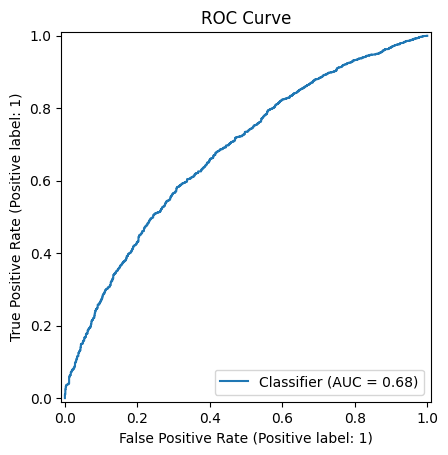

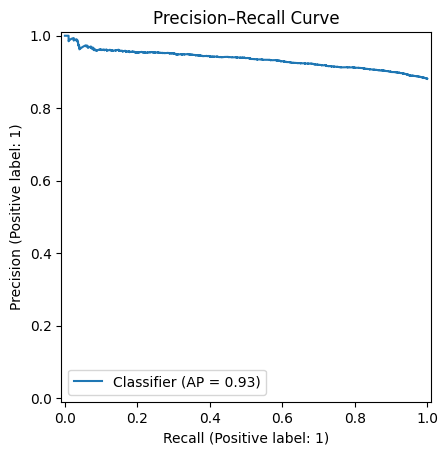

/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


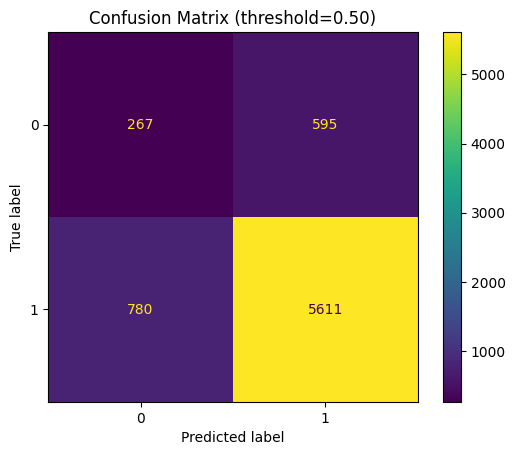

In [10]:
#7) Visualizations: ROC, PR, Confusion Matrix
RocCurveDisplay.from_predictions(y_te, y_proba)
plt.title("ROC Curve"); plt.show()

PrecisionRecallDisplay.from_predictions(y_te, y_proba)
plt.title("Precision–Recall Curve"); plt.show()

ConfusionMatrixDisplay.from_estimator(logit_pipe, X_te, y_te)
plt.title("Confusion Matrix (threshold=0.50)"); plt.show()

In [11]:
#Threshold tuning (F1) + trade-off plot + tuned confusion
from sklearn.metrics import f1_score, precision_score, recall_score

grid = np.linspace(0.05, 0.95, 19)
f1s  = [f1_score(y_te, (y_proba>=t).astype(int)) for t in grid]
prec = [precision_score(y_te, (y_proba>=t).astype(int), zero_division=0) for t in grid]
rec  = [recall_score(y_te, (y_proba>=t).astype(int)) for t in grid]

best_t = float(grid[int(np.argmax(f1s))])
best_t


0.05

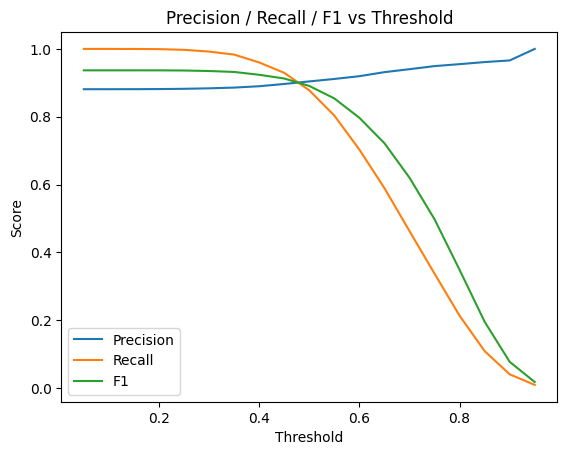

In [12]:
plt.plot(grid, prec, label="Precision")
plt.plot(grid, rec,  label="Recall")
plt.plot(grid, f1s,  label="F1")
plt.xlabel("Threshold"); plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold")
plt.legend(); plt.show()

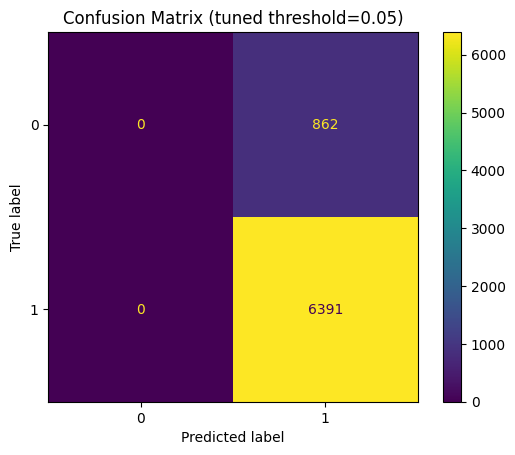

In [13]:
ConfusionMatrixDisplay.from_predictions(y_te, (y_proba>=best_t).astype(int))
plt.title(f"Confusion Matrix (tuned threshold={best_t:.2f})"); plt.show()

In [ ]:
#9) Hyperparameter tuning (GridSearchCV, ROC-AUC)
param_grid = {
    "lr__C": [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    "lr__penalty": ["l2"],
    "lr__solver": ["lbfgs", "saga"],
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=logit_pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)
gs.fit(X_tr, y_tr)

print("Best CV ROC AUC:", round(gs.best_score_, 4))
print("Best params:", gs.best_params_)

best_model = gs.best_estimator_
best_proba = best_model.predict_proba(X_te)[:, 1]
print("Test ROC AUC (best):", round(roc_auc_score(y_te, best_proba), 4))


/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/impute/_base.py:653: UserWarning: Skipping features without any observed values: ['attr_Smoking']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/Users/swikritijoshi/Desktop/yelp_review_project/miniconda3/lib/python3.13/site-packages/sklearn/imp